In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [44]:
data = pd.read_csv('Documents/Anexo 2 - Dataset Vehicle/car data.csv')

In [45]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [46]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Text(0.5, 1.0, 'identificación de datos atipicos')

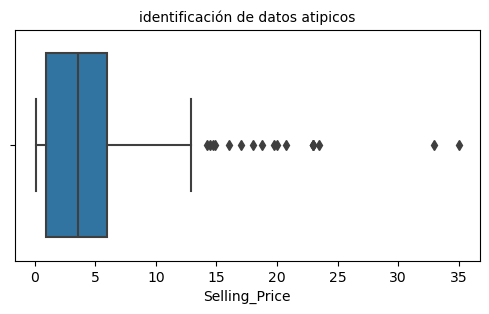

In [47]:
#Identificacion de datos faltantes o atipicos 

plt.figure(figsize=(6,3))
sns.boxplot(x=data['Selling_Price'])
plt.title('identificación de datos atipicos', fontsize=10)


In [48]:
#Conteo de datos atipicos 

min = 0.1
max = 35.000
total_atipicos = ((data['Selling_Price']<min)|(data['Selling_Price']>max)).sum()
print('El total de atipicos es {}'.format(total_atipicos))


El total de atipicos es 0


In [49]:
#año que más se repite

year = data['Year'].mode()
print('El año que mas se repite es: {}'.format(year[0]))

El año que mas se repite es: 2015


In [50]:
price = data['Selling_Price'].mode()
print('El precio que mas se repite es: {}'.format(price[0]))

El precio que mas se repite es: 0.45


In [51]:
data = data[(data['Selling_Price']<max)&(data['Selling_Price']>min)]

In [52]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [53]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.665552,4.575084,7.367291,36625.003344,0.043478
std,2.859433,4.779370,7.125045,38811.367512,0.248720
min,2003.000000,0.120000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.230000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.875000,47500.000000,0.000000
max,2018.000000,33.000000,36.230000,500000.000000,3.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [55]:
#Eliminamos los datos nulos

data = data.dropna()

In [56]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [57]:
year_price = data[['Year', 'Selling_Price']]
year_price_avg = year_price.groupby('Year').mean()


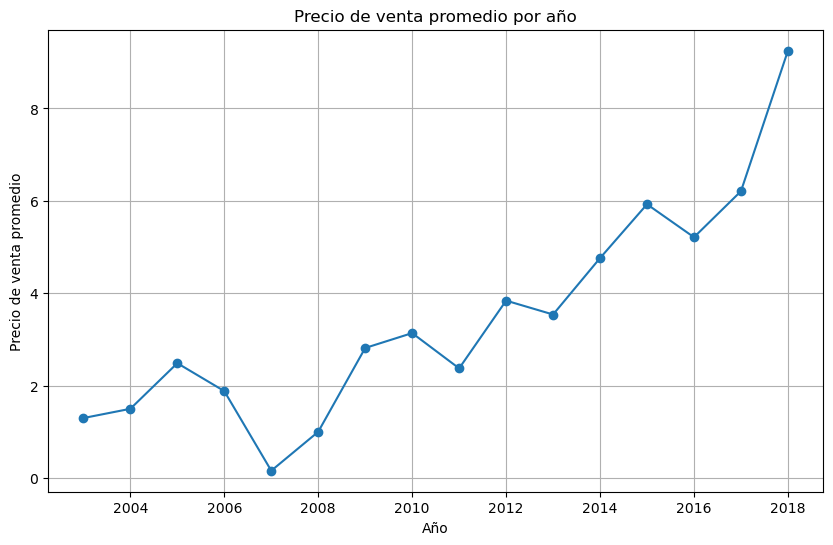

In [58]:
# Crear un gráfico de líneas para mostrar los cambios en el precio de venta a lo largo de los años
plt.figure(figsize=(10, 6))
plt.plot(year_price_avg.index, year_price_avg['Selling_Price'], marker='o', linestyle='-')
plt.title('Precio de venta promedio por año')
plt.xlabel('Año')
plt.ylabel('Precio de venta promedio')
plt.grid(True)
plt.show()


In [59]:
regression = LinearRegression()
regression.fit(year_price_avg.index.values.reshape(-1, 1), year_price_avg['Selling_Price'])
predicted_prices = regression.predict(year_price_avg.index.values.reshape(-1, 1))



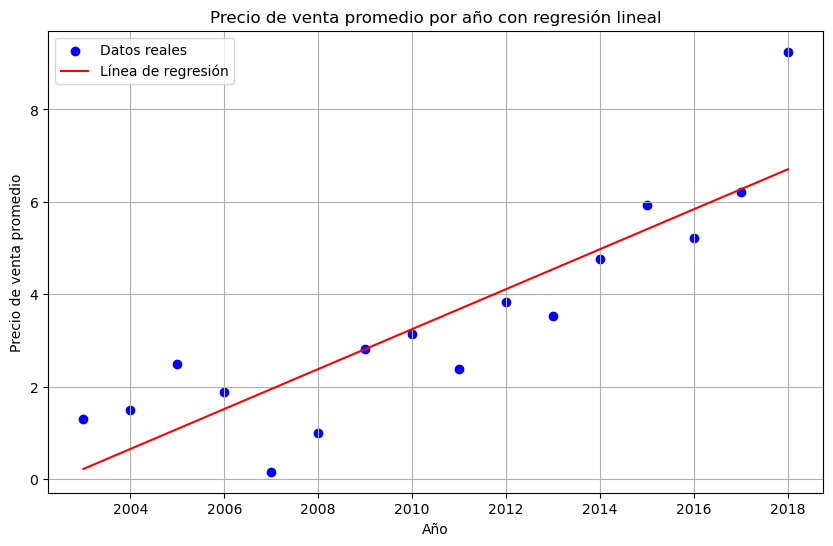

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(year_price_avg.index, year_price_avg['Selling_Price'], label='Datos reales', color='blue')
plt.plot(year_price_avg.index, predicted_prices, label='Línea de regresión', color='red')
plt.title('Precio de venta promedio por año con regresión lineal')
plt.xlabel('Año')
plt.ylabel('Precio de venta promedio')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
X = data[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
y = data['Selling_Price']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
regression.fit(X_train, y_train)

LinearRegression()

In [71]:
# Realizar predicciones en el conjunto de prueba
y_pred = regression.predict(X_test)


In [72]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)


Error cuadrático medio (MSE): 30.061999405749265
Coeficiente de determinación (R^2): 0.059395040838120194


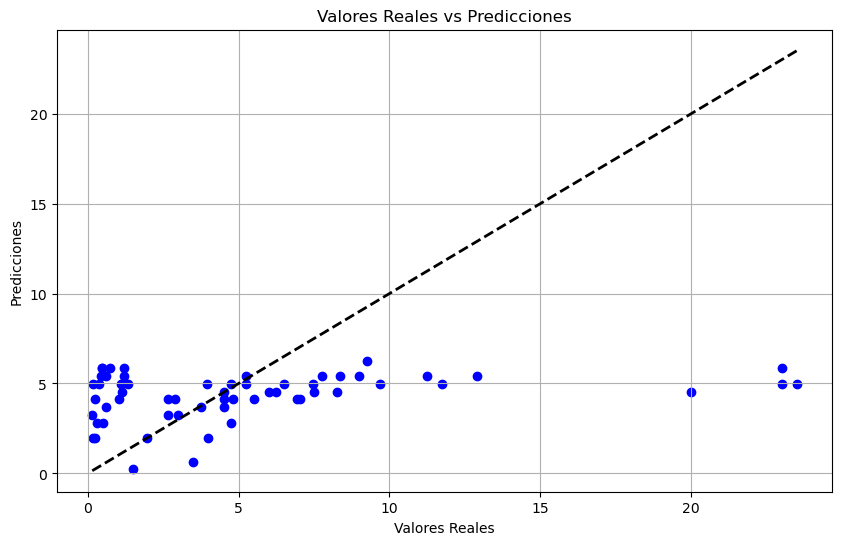

In [73]:
# Grafica de los valores reales vs las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.grid(True)
plt.show()